In [100]:
import os
import cv2
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
%matplotlib inline
import numpy as np
from keras.layers import Dropout
from sklearn import preprocessing

In [124]:
def prepare_training_data(path_to_dir):
    images = []
    labels_data = []
    labels = os.listdir(path_to_dir)
    for label in labels:
        if label.find('jpg') == -1:
            images_dir = os.listdir(path_to_dir+"/"+label)
#             images = []
            for image in images_dir:
                img = cv2.resize(cv2.imread(path_to_dir+"/"+label+"/"+image), (80, 80))
                
                #convert the test image to gray image as opencv face detector expects gray image
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                images.append(gray_img)
                labels_data.append(label)
    
    return images, labels_data

In [168]:
path_to_dir = 'alphabets-20200121T144707Z-001/alphabets/'
image_data, labels_data = prepare_training_data(path_to_dir)

In [126]:
# os.listdir(path_to_dir+"/"+'A')

In [169]:
image_data[0]

array([[112, 122, 128, ..., 120, 117, 113],
       [123, 126, 133, ..., 123, 119, 115],
       [123, 126, 133, ..., 123, 119, 115],
       ...,
       [131, 134, 136, ..., 111, 108, 104],
       [131, 134, 136, ..., 111, 108, 104],
       [125, 131, 134, ..., 108, 106, 101]], dtype=uint8)

In [170]:
len(image_data)

4972

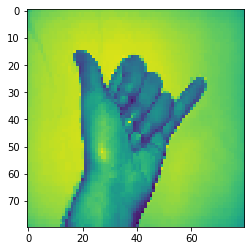

In [171]:
plt.imshow(image_data[7])

In [172]:
# plt.imshow(test_data[0][10])

In [173]:
labels_data[10]

'Y'

In [174]:
len(image_data), len(labels_data)

(4972, 4972)

In [138]:
# train_data.append(image_data[:200])
# test_data.append(image_data[i][199:])

In [175]:
# len(train_data), len(train_data[0]), len(test_data[0]), len(train_data[0][0]), len(test_data[0][0][0])

In [176]:
# test_data_2 = []
# test_label = []
# for i in range(test_data):
#     for j in range(test_data[i])
#         test_data_2.append(test_data[i][j])
#         test_label.append()

In [177]:
X_train = np.array(image_data)
# X_test = np.array(test_data)

In [178]:
X_train.shape

(4972, 80, 80)

In [179]:
X_train = X_train.reshape(4972,80,80,1)

In [190]:
y_train = labels_data

In [191]:
y_train = np.array(y_train)

In [192]:
y_train.shape

(4972,)

In [193]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [194]:
y_train = le.transform(y_train)

In [189]:
# y_train = np.array(y_train)

In [186]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [196]:
y_train = to_categorical(y_train)

In [197]:
y_train.shape

(4972, 24)

In [202]:
model = Sequential()
model.add(Conv2D(64, activation='relu', input_shape = (80, 80, 1), kernel_size=3))
model.add(Conv2D(64, activation='relu', kernel_size=3))
model.add(Dropout(0.1))
model.add(Conv2D(64, activation='relu', kernel_size=3))
model.add(Dropout(0.2))
model.add(Conv2D(32, activation='relu', kernel_size=3))
model.add(Flatten())
model.add(Dense(24, activation='softmax'))

In [203]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [204]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
4972/4972 [==============================] - 316s 64ms/step - loss: 5.0807 - accuracy: 0.3369
Epoch 2/3
4972/4972 [==============================] - 297s 60ms/step - loss: 1.0043 - accuracy: 0.7222
Epoch 3/3
4972/4972 [==============================] - 291s 58ms/step - loss: 0.5054 - accuracy: 0.8777


In [219]:
pr = model.predict(X_train[1231:1232])

In [220]:
pr

array([[7.5992660e-22, 6.8462975e-15, 1.0775313e-19, 4.0957583e-38,
        3.2078330e-27, 5.4622168e-23, 2.4595869e-01, 8.7531471e-06,
        6.3069216e-12, 1.1182884e-15, 2.1609921e-14, 6.0823017e-16,
        1.4191885e-13, 2.0513016e-13, 7.5262421e-01, 7.2566198e-12,
        1.0977185e-21, 3.7116972e-26, 4.7075038e-23, 5.1084676e-15,
        2.2317910e-16, 1.5243515e-20, 9.4318797e-10, 1.4083396e-03]],
      dtype=float32)

In [221]:
max(pr[0])

0.7526242

In [225]:
pr.argmax()

14

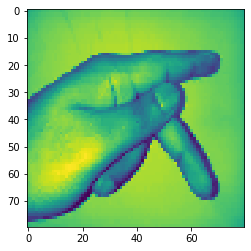

In [222]:
plt.imshow(X_train[1232].reshape(80,80))

In [223]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
